In [1]:
from sklearn import datasets, model_selection, neighbors
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
data, target = datasets.load_wine(return_X_y=True, as_frame=True)

In [3]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
target

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [5]:
# разделим данные с помощью Scikit-Learn's train_test_split
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target, test_size=0.2, random_state=42)

In [6]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Точность классификации: {accuracy_score(y_test, y_pred)}")

Точность классификации: 0.7222222222222222


# Нормализация



In [7]:
data_norm = data.copy()

In [8]:
cols_for_normalize = ['alcohol', 'alcalinity_of_ash', 'magnesium', 'color_intensity', 'proline']
for col in cols_for_normalize:
    data_norm[col] = (data_norm[col] - data_norm[col].min()) / (data_norm[col].max() - data_norm[col].min())

In [9]:
data_norm

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,1.71,2.43,0.257732,0.619565,2.80,3.06,0.28,2.29,0.372014,1.04,3.92,0.561341
1,0.571053,1.78,2.14,0.030928,0.326087,2.65,2.76,0.26,1.28,0.264505,1.05,3.40,0.550642
2,0.560526,2.36,2.67,0.412371,0.336957,2.80,3.24,0.30,2.81,0.375427,1.03,3.17,0.646933
3,0.878947,1.95,2.50,0.319588,0.467391,3.85,3.49,0.24,2.18,0.556314,0.86,3.45,0.857347
4,0.581579,2.59,2.87,0.536082,0.521739,2.80,2.69,0.39,1.82,0.259386,1.04,2.93,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,5.65,2.45,0.510309,0.271739,1.68,0.61,0.52,1.06,0.547782,0.64,1.74,0.329529
174,0.623684,3.91,2.48,0.639175,0.347826,1.80,0.75,0.43,1.41,0.513652,0.70,1.56,0.336662
175,0.589474,4.28,2.26,0.484536,0.543478,1.59,0.69,0.43,1.35,0.761092,0.59,1.56,0.397290
176,0.563158,2.59,2.37,0.484536,0.543478,1.65,0.68,0.53,1.46,0.684300,0.60,1.62,0.400856


In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data_norm, target, test_size=0.2, random_state=42)

In [11]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8888888888888888

# KNN из методички

In [12]:
d_dict = {}
k = 5

for i in range(len(X_test)):
  w = np.array([1])
  for v in range(len(X_train)):
    a = w*(X_test.iloc[i] - X_train.iloc[v])
    a = np.power(a,2)
    a = np.sum(a)
    a = np.power(a,1/2)
    d_dict[(i, v)] = a

d_dict

{(0, 0): 3.0210702188847103,
 (0, 1): 4.040351629914748,
 (0, 2): 2.494011260779753,
 (0, 3): 3.087280465373446,
 (0, 4): 1.9230362967723456,
 (0, 5): 2.3535344829546805,
 (0, 6): 2.5394859600417665,
 (0, 7): 3.392448134677254,
 (0, 8): 3.3652399389406167,
 (0, 9): 1.4590115262615608,
 (0, 10): 1.8249379887663002,
 (0, 11): 1.9068881340786994,
 (0, 12): 3.8499581992659118,
 (0, 13): 1.675701330819674,
 (0, 14): 2.870056084406263,
 (0, 15): 1.5726605247374108,
 (0, 16): 1.4245200877011177,
 (0, 17): 3.1457949327181036,
 (0, 18): 3.376116419439009,
 (0, 19): 2.031402628972375,
 (0, 20): 3.0665385873043065,
 (0, 21): 1.68244191114461,
 (0, 22): 1.2141393415546564,
 (0, 23): 1.4539600153721322,
 (0, 24): 4.433766455475603,
 (0, 25): 2.084431417096361,
 (0, 26): 3.052934318407122,
 (0, 27): 3.2893290386185283,
 (0, 28): 1.9532285126657012,
 (0, 29): 1.4779982149338673,
 (0, 30): 1.875131909733461,
 (0, 31): 3.1636202830795055,
 (0, 32): 0.9266178206664141,
 (0, 33): 1.5389953541424601,
 (0,

In [13]:
def dict_to_df(d_dict):
  i_keys = [k[0] for k in d_dict.keys()]
  j_keys = [k[1] for k in d_dict.keys()]
  a_list = list(d_dict.values())
  d_df = pd.DataFrame({'X_test': i_keys, 'X_train': j_keys, 'd': a_list})
  return d_df

In [14]:
d_df = dict_to_df(d_dict)
d_df

,X_test,X_train,d
0,0,0,3.021070
1,0,1,4.040352
2,0,2,2.494011
3,0,3,3.087280
4,0,4,1.923036
...,...,...,...
5107,35,137,1.308941
5108,35,138,2.416924
5109,35,139,1.499293
5110,35,140,3.322226


In [15]:
result_df = d_df.groupby('X_test').apply(lambda group: group.nsmallest(k, 'd')).reset_index(drop=True)

/var/folders/hh/fhwp4kk9375b4r8jygg93gzc0000gn/T/ipykernel_31521/3989278228.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = d_df.groupby('X_test').apply(lambda group: group.nsmallest(k, 'd')).reset_index(drop=True)


In [16]:
result_df

,X_test,X_train,d
0,0,32,0.926618
1,0,86,1.015871
2,0,55,1.072573
3,0,58,1.084093
4,0,117,1.095520
...,...,...,...
175,35,61,0.759940
176,35,125,0.821291
177,35,15,0.824961
178,35,136,0.859870


In [17]:
y_pred = []

for el in result_df['X_test'].unique():
    classes, dist = [0, 0, 0], [0, 0, 0]

    for i, x_train in enumerate(result_df[result_df['X_test'] == el]['X_train']):
        y_need = y_train.iloc[x_train]
        classes[y_need] += 1
        #dist[y_need] += result_df['d'][i]
        dist[y_need] += result_df[result_df['X_test'] == el]['d'].iloc[i]

    if classes.count(max(classes)) > 1:
        if(classes.count(max(classes)) != 3):
          inf_index = np.argmin(classes)
          dist[inf_index] = np.inf
        min_dist_index = np.argmin(dist)
        y_pred.append(min_dist_index)
    else:
        max_classes = max(classes)
        y_pred.append(classes.index(max_classes))

In [18]:
accuracy_score(y_test, y_pred)

0.8888888888888888

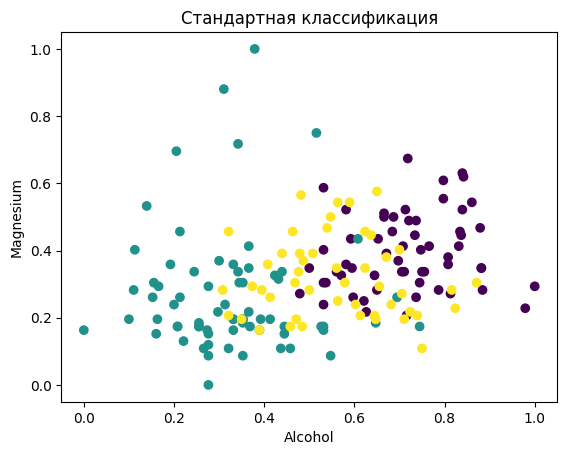

In [19]:
import matplotlib.pyplot as plt
cmap = plt.colormaps['viridis']
plt.scatter(data_norm['alcohol'], data_norm['magnesium'], c=target, cmap=cmap)
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')
plt.title('Стандартная классификация')

plt.show()

In [20]:
new_target = list(y_train) + list(y_pred)
new_target = pd.Series(data=new_target)
new_target

0      2
1      2
2      1
3      2
4      0
      ..
173    1
174    2
175    0
176    0
177    0
Length: 178, dtype: int64

In [21]:
new_data = pd.concat([X_train, X_test])
new_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
158,0.871053,1.68,2.70,0.742268,0.304348,2.80,1.31,0.53,2.70,1.000000,0.57,1.96,0.272468
137,0.394737,5.51,2.64,0.742268,0.282609,1.79,0.60,0.63,1.10,0.317406,0.82,1.69,0.169044
98,0.352632,1.07,2.10,0.407216,0.195652,3.52,3.75,0.24,1.95,0.274744,1.04,2.77,0.272468
159,0.644737,1.67,2.64,0.613402,0.206522,2.60,1.10,0.52,2.29,0.893345,0.57,1.78,0.243937
38,0.536842,1.50,2.10,0.252577,0.304348,2.40,2.64,0.28,1.37,0.206485,1.18,2.69,0.529244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.352632,1.63,2.30,0.716495,0.195652,2.22,2.45,0.40,1.90,0.071672,0.89,2.78,0.045649
145,0.560526,3.57,2.15,0.536082,0.347826,1.50,0.55,0.43,1.30,0.232082,0.60,1.68,0.393723
31,0.671053,1.66,2.36,0.438144,0.391304,2.86,3.19,0.22,1.95,0.479522,1.09,2.88,0.882311
12,0.715789,1.73,2.41,0.278351,0.206522,2.60,2.76,0.29,1.81,0.368601,1.15,2.90,0.743224


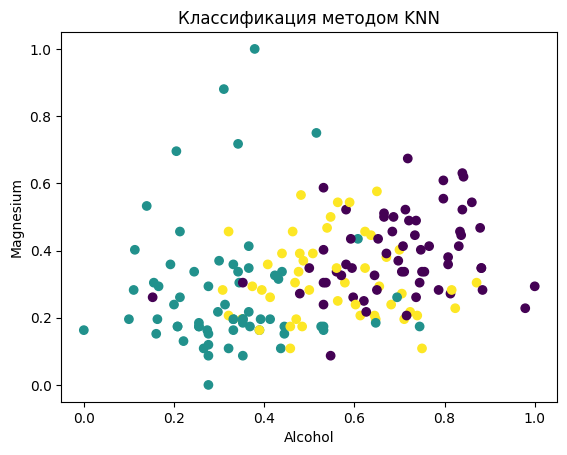

In [22]:
plt.scatter(new_data['alcohol'], new_data['magnesium'], c=new_target, cmap=cmap)
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')
plt.title('Классификация методом KNN')

plt.show()

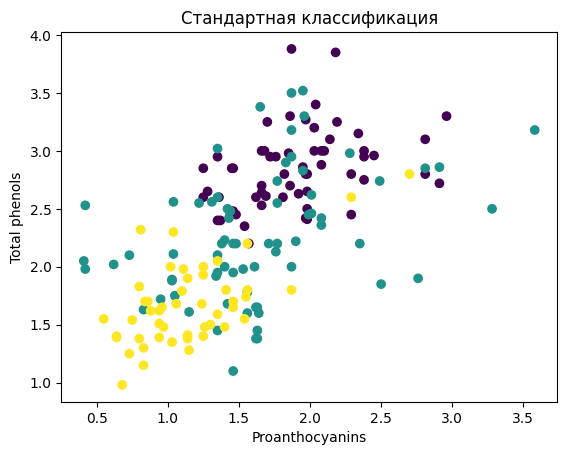

In [23]:
cmap = plt.colormaps['viridis']
plt.scatter(data_norm['proanthocyanins'], data_norm['total_phenols'], c=target, cmap=cmap)
plt.xlabel('Proanthocyanins')
plt.ylabel('Total phenols')
plt.title('Стандартная классификация')

plt.show()

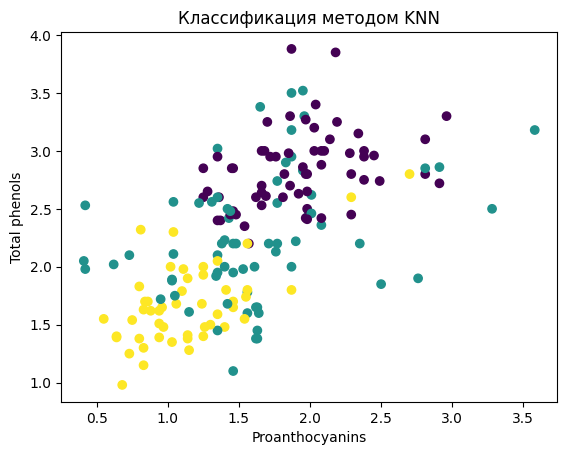

In [24]:
plt.scatter(new_data['proanthocyanins'], new_data['total_phenols'], c=new_target, cmap=cmap)
plt.xlabel('Proanthocyanins')
plt.ylabel('Total phenols')
plt.title('Классификация методом KNN')

plt.show()